##### BAIS 3250 Project Check In
###### April 23, 2025
###### Ella Solie

Import libraries

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [195]:
# Load integrated dataset
df = pd.read_csv("esolie_bais3250_project_integrated.csv")

Question 1: To what extent do audience ratings of movie adaptations reflect the reception of their original books?

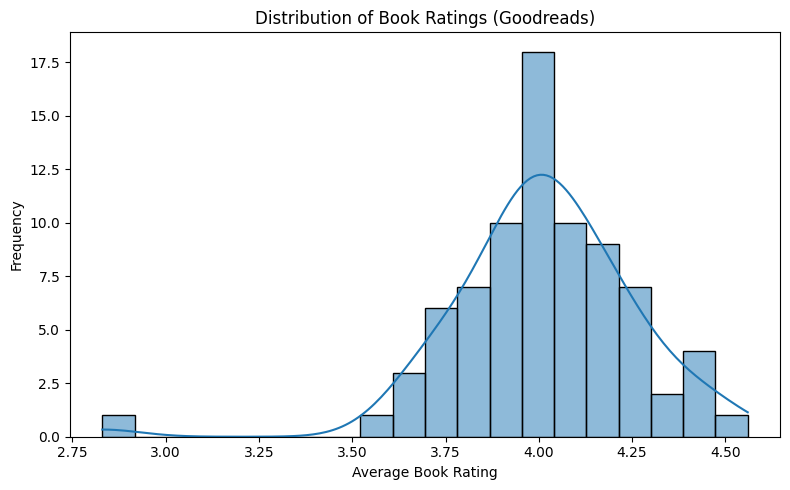

In [198]:
# Univariate Analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['average_rating_book'], bins=20, kde=True)
plt.title("Distribution of Book Ratings (Goodreads)")
plt.xlabel("Average Book Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

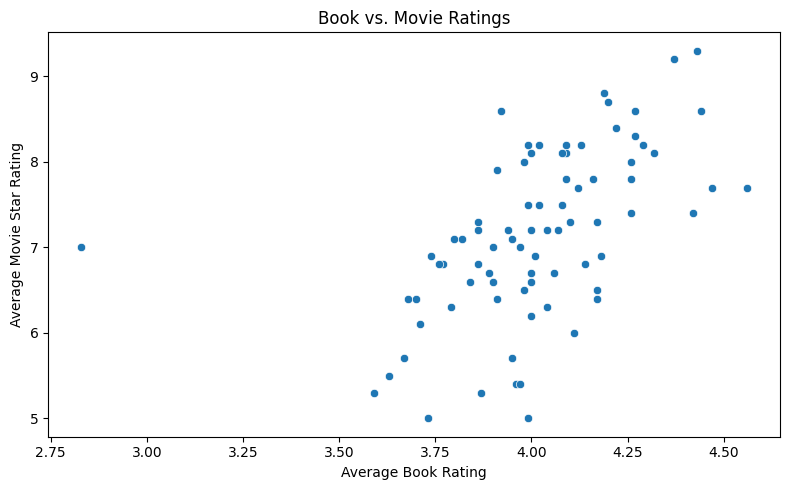

In [200]:
# Bivariate Analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='average_rating_book', y='average_star_rating_movie')
plt.title("Book vs. Movie Ratings")
plt.xlabel("Average Book Rating")
plt.ylabel("Average Movie Star Rating")
plt.tight_layout()
plt.show()

In [202]:
# Hypothesis Test
correlation, p_value = stats.pearsonr(df['average_rating_book'], df['average_star_rating_movie'])
print(f"Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.4e}")

Correlation: 0.537
P-value: 3.3882e-07


In [204]:
# Machine Learning Model: Predict movie rating from book features
X1 = df[['average_rating_book', 'num_pages_book', 'ratings_count_book']]
y1 = df['average_star_rating_movie']

# Split into train/test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate
print("Model Evaluation Results:\n")
for name, model in models.items():
    model.fit(X_train1, y_train1)
    y_pred = model.predict(X_test1)
    mse = mean_squared_error(y_test1, y_pred)
    r2 = r2_score(y_test1, y_pred)
    print(f"{name} -> MSE: {mse:.3f}, R²: {r2:.3f}")

Model Evaluation Results:

Linear Regression -> MSE: 0.878, R²: 0.228
Ridge Regression -> MSE: 0.920, R²: 0.191
Lasso Regression -> MSE: 1.235, R²: -0.086
Random Forest -> MSE: 1.143, R²: -0.005


Question 2: Does the time gap between a book's release and its film adaptation impact how audiences rate the movie?

In [207]:
# Make sure the book publication date is in datetime format
df['publication_date_book'] = pd.to_datetime(df['publication_date_book'], format='%m/%d/%y', errors='coerce')

# Extract just the year
df['publication_year'] = df['publication_date_book'].dt.year

# Now compute the year gap
df['year_gap'] = df['release_year_movie'] - df['publication_year']
df = df[df['year_gap'] > 0]

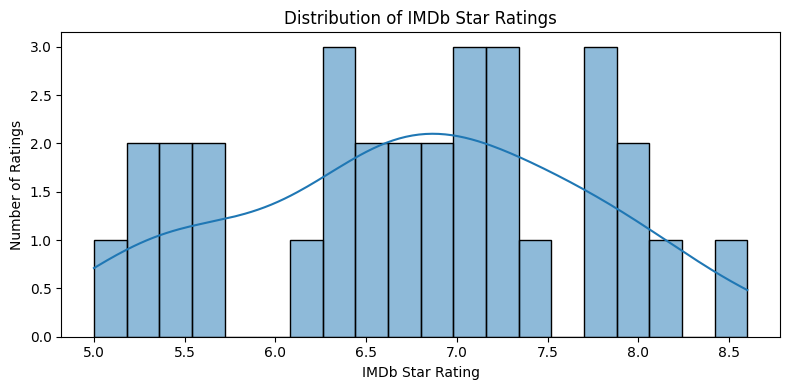

In [209]:
# Univariate Analysis: IMDb Star Ratings
plt.figure(figsize=(8, 4))
sns.histplot(df['average_star_rating_movie'].dropna(), bins=20, kde=True)
plt.title("Distribution of IMDb Star Ratings")
plt.xlabel("IMDb Star Rating")
plt.ylabel("Number of Ratings")
plt.tight_layout()
plt.show()

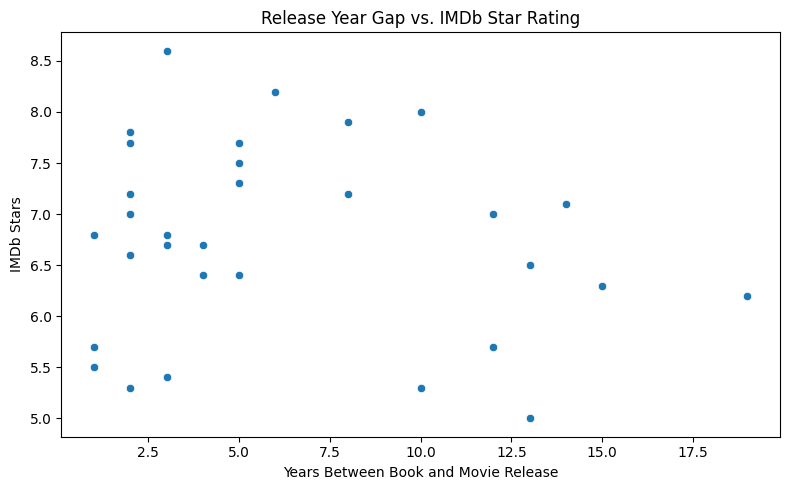

In [211]:
# Bivariate Analysis: IMDb Star Rating vs Year Gap
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='year_gap', y='average_star_rating_movie')
plt.title("Release Year Gap vs. IMDb Star Rating")
plt.xlabel("Years Between Book and Movie Release")
plt.ylabel("IMDb Stars")
plt.tight_layout()
plt.show()

In [213]:
df2 = df[['year_gap', 'average_star_rating_movie']].dropna()

corr, p = pearsonr(df2['year_gap'], df2['average_star_rating_movie'])
print(f"Correlation: {corr:.3f}")
print(f"P-Value: {p:.4f}")

Correlation: -0.147
P-Value: 0.4296


In [215]:
# Create X and y only from filtered data
X = df[['year_gap']]
y = df['average_star_rating_movie']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

Mean Squared Error: 1.019
R²: 0.016


Question 3: Are certain MPAA ratings (PG, PG-13, R) associated with higher or lower average audience scores for book-to-movie adaptations?

In [218]:
# Filter to remove NC-17 & Not Rated movies. 
df = df[df['movie_rating'].isin(['PG', 'PG-13', 'R'])]

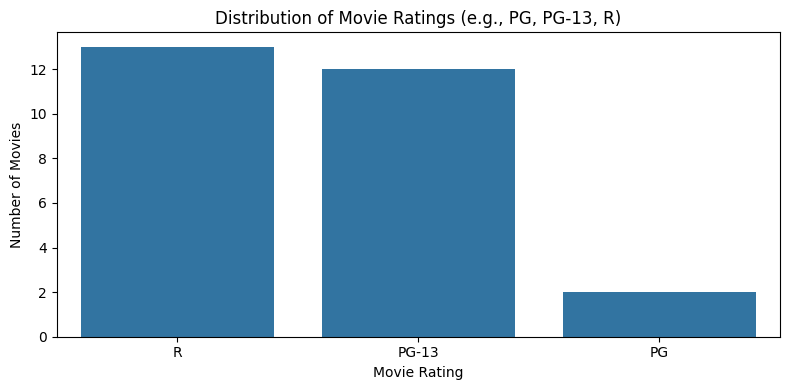

In [220]:
# Univariate Analysis: Movie Rating Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='movie_rating', order=df['movie_rating'].value_counts().index)
plt.title("Distribution of Movie Ratings (e.g., PG, PG-13, R)")
plt.xlabel("Movie Rating")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

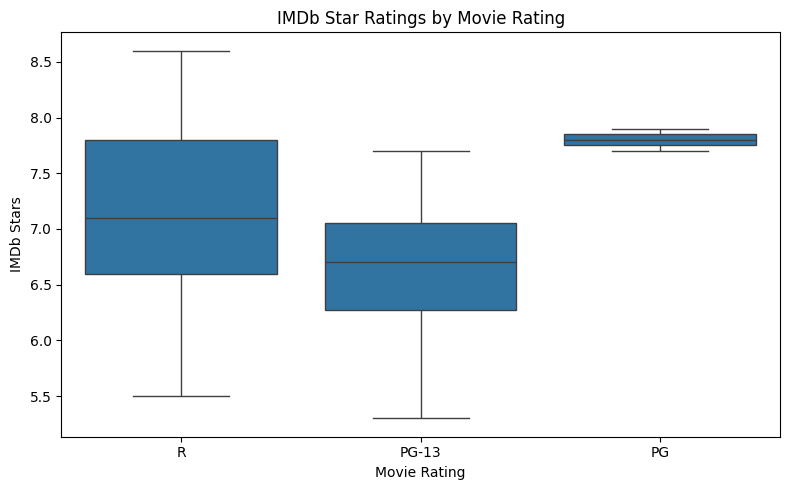

In [222]:
# Bivariate Analysis: Boxplot of IMDb Stars by Rating
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='movie_rating', y='average_star_rating_movie', order=df['movie_rating'].value_counts().index)
plt.title("IMDb Star Ratings by Movie Rating")
plt.xlabel("Movie Rating")
plt.ylabel("IMDb Stars")
plt.tight_layout()
plt.show()

In [224]:
# Step 1: Drop missing values and create a clean copy
df_corr = df.dropna(subset=['movie_rating', 'average_star_rating_movie']).copy()

# Step 2: Convert movie_rating to ordinal numeric codes
df_corr['movie_rating_code'] = df_corr['movie_rating'].astype('category').cat.codes

# Step 3: Run correlation test
corr, p_val = spearmanr(df_corr['movie_rating_code'], df_corr['average_star_rating_movie'])

# Step 4: Print results
print(f"Correlation: {corr:.3f}")
print(f"P-Value: {p_val:.4f}")

Correlation: 0.096
P-Value: 0.6354


Question 3: How does review sentiment polarity relate to IMDb star rating between positively and negatively received movie adaptations?

In [255]:
# Compute sentiment polarity
df['polarity'] = df['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

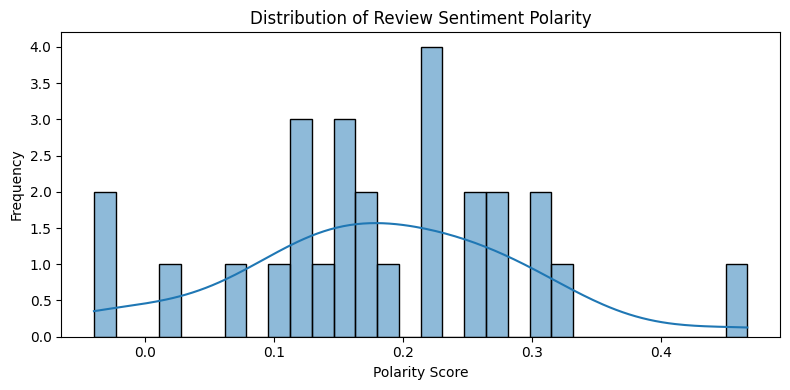

In [259]:
# Univariate Analysis
plt.figure(figsize=(8, 4))
sns.histplot(df['polarity'].dropna(), bins=30, kde=True)
plt.title("Distribution of Review Sentiment Polarity")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

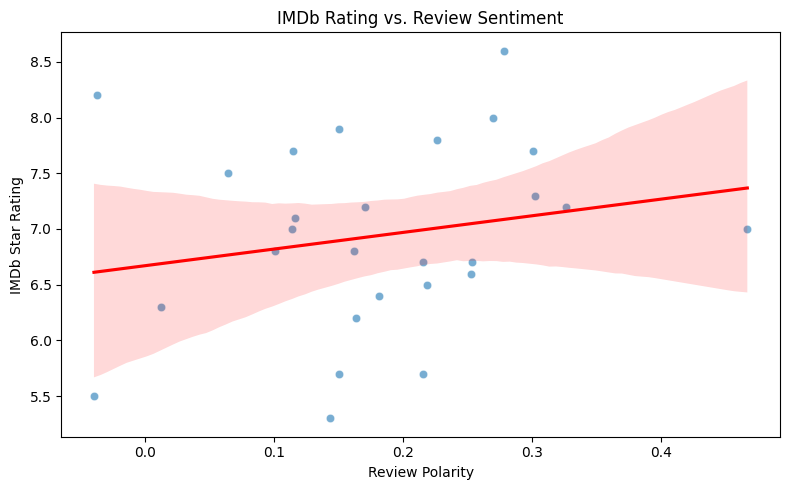

In [267]:
# Bivariate Analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(x='polarity', y='average_star_rating_movie', data=df, alpha=0.6)
sns.regplot(x='polarity', y='average_star_rating_movie', data=df, scatter=False, color='red')
plt.title("IMDb Rating vs. Review Sentiment")
plt.xlabel("Review Polarity")
plt.ylabel("IMDb Star Rating")
plt.tight_layout()
plt.show()

In [273]:
# Correlation
df_corr = df[['polarity', 'average_star_rating_movie']].dropna()
corr, p = pearsonr(df_corr['polarity'], df_corr['average_star_rating_movie'])
print(f"Correlation: {corr:.3f}")
print(f"P-Value: {p:.4f}")

Correlation: 0.199
P-Value: 0.3193


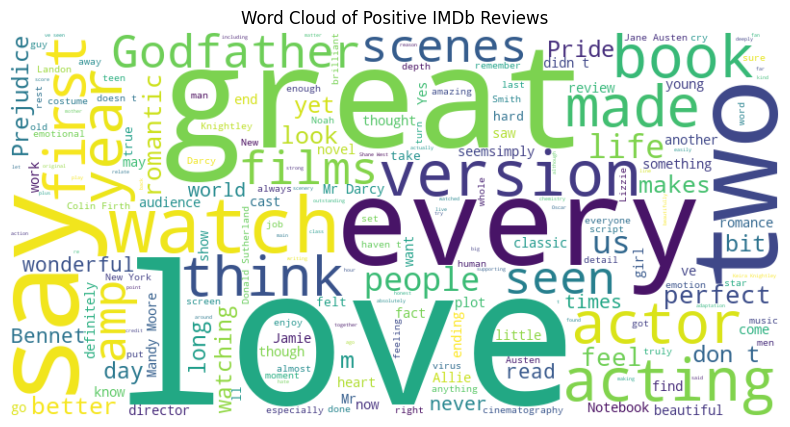

In [275]:
# Filter to positive reviews
positive_reviews = df_reviews[df_reviews['polarity'] > 0]


# Define custom stopwords
custom_stopwords = STOPWORDS.union({
    'movie', 'film', 'one', 'make', 'also', 'see', 'get', 'like', 'just', 'really', 'even', 'still', 'lot', 'many', 'thing', 'things', 'believe',
    'well', 'way', 'time', 'good', 'bad', 'much', 'could', 'wonderfully', 'would', 'quot', 'will', 's', 'Fredo', 'Clemenza', 'John', 'Cazale', 'Richard', 
    'quite', 'movies', 'part', 'Castellano', 'scene', 'story', 'characters', 'performance', 'brings', 'character', 'real', 'relationship',
    'family', 'performance', 'must', 'rank', 'best', 'along', 'touch', 'ensemble', 'Particularly', 'spot', 'give', 'performances', 'role'})

# Create and display positive reviews word cloud
wordcloud_pos = WordCloud(
    width=800, height=400, background_color='white', stopwords=custom_stopwords
).generate(" ".join(positive_reviews['review_text'].dropna()))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive IMDb Reviews")
plt.show()

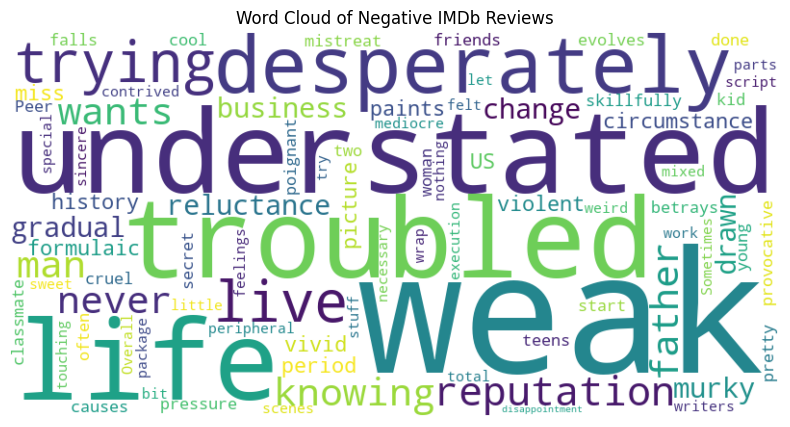

In [277]:
# Filter to negative reviews
negative_reviews = df_reviews[df_reviews['polarity'] < 0]

# Use the same custom stopwords
wordcloud_neg = WordCloud(
    width=800, height=400, background_color='white', stopwords=custom_stopwords
).generate(" ".join(negative_reviews['review_text'].dropna()))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Negative IMDb Reviews")
plt.show()